# Principled Peeking in A/B Testing



<center>
<img src="https://images.unsplash.com/photo-1546903353-4649964874f2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3950&q=80)"
 width=700>
</center>

Image from [Unsplash](https://unsplash.com/photos/F85pIdl7cS8) by Pawel Szvmanski and [Unlocking Peeking in AB-Tests](https://towardsdatascience.com/unlocking-peeking-in-ab-tests-7847b9c2f6bb) by Dennis Meisner

## Overview

In the previous chapter we examined the early peeking problem using a simulation study. We noticed that although classical tests can be used in A/B testing problems, those tests are designed for a fixed sample size. Analyzing a sample smaller than planned and stopping the experiment based on early results seriously inflates the type I error rate of the experiment. The goal of this chapter is to introduce some basic techniques of principled peeking. 

```{important}
Stopping an experiment and rejecting $H_0$ as soon as an observed $p$-value is below the specified significance level can drastically inflate the type I error rate
```

## Sequential testing 

**Sequential tests** are decision rules that allows users to test data sequentially as data come in:

- The experiment may be stopped earlier, meaning the sample size is dynamic, rather than fixed

- Many tests (a.k.a., multiple comparisons) are performed (sequentially) 

```{caution}
If you make lots of comparisons, the error rates are inflated!!
```

There are different classes of sequential approaches: 

```{admonition} Definition
:class: tip
**Group sequential designs**: the analyst *pre-specifies* when to inspect the data (interim analysis) and performs each analysis as a fixed sample one. 

**Full sequential designs**: the analyst performs an analysis after every new observation, sequentially, in a principled way.
```

New platforms allow users to test data sequentially as data come in: 

- Users *are* monitoring results as they collect data and are making decisions accordingly

- Users need to adaptively determine the sample size of the experiments 

- There are large opportunity costs associated with longer experiments

- When done correctly, stopping an experiment earlier (or re-designing it) can be beneficial

## Principled Peeking 

Can we control the risk of wrongly rejecting the null hypothesis in A/B testing when early peeking and stopping is desired?

Many methods have been proposed to address this problem in the context of **A/B testing experimental designs**:  

- A basic way to control the type I error rate inflation in multiple testing problems is to adjust the p-value. For example, p-values (or critical values) can be adjusted using a Bonferroni corection.

- Some new methods propose using a different test statistics and computing $p$-values differently. For example, in the *Optimizely platform*, a mixture sequential probability ratio test (mSPRT) is performed and *always valid* $p$-values are constructed. 
    
    
```{important}
With a principled peeking approach, the significance level of each interim analysis is set at a level that controls the Type I error rate, even if the experiment is stopped earlier.
```

### Bonferroni

Although originally designed for independent tests, Bonferroni correction can be used to control the type I error rate in A/B testing

**Bonferroni's correction** can be thought as: 

- an adjustment of the $p$-values, multiplying them by the number of comparisons, and keeping the significance level at a desired threshold, or 

- an adjustment of the significance threshold $\alpha$, dividing it by the number of comparisons, and using raw p-values, or

- (an adjustment of) the critical value, computed with a sampling distribution, corresponding to the adjusted significance threshold

In [1]:
library(tidyverse)
library(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 5) # Adjust these numbers so the plot looks good in your desktop.
options(warn=-1)

t_x_axis <- seq(-4, 4, 0.1)
crit_unadj <- qt(1 - 0.1, 1998)
crit_bonferroni <- qt(1 - 0.01, 1998)
t_stat <- 1.8

t_dens_data <- data.frame( x = t_x_axis, 
                            y1 = dt(t_x_axis,1998))

test_plot <- ggplot(t_dens_data, aes(x = t_x_axis)) + 
geom_line( aes( y = y1, colour = 'H0 is true' ), size = 1.2 ) + 
geom_area( aes( y = y1, x = ifelse(x > crit_unadj, t_x_axis, NA)), fill = 'black',alpha=0.3) + 
geom_area( aes( y = y1, x = ifelse(x > t_stat, t_x_axis, NA)), fill = 'red',alpha=0.3) + 
geom_area( aes( y = y1, x = ifelse(x > crit_bonferroni, t_x_axis, NA)), fill = 'blue',alpha=0.6) + 
theme(text = element_text(size = 18),
      legend.title = element_blank() ) +
labs(x = '', y = '' ) + 
geom_point(y=0,x=t_stat,size = 3,shape=19,aes(color = "t-stat"))+
geom_point(y=0,x=crit_unadj,size = 3,shape=19,aes(color = "unadj critical val"))+
geom_point(y=0,x=crit_bonferroni,size = 3,shape=1,stroke = 2, aes(color = "bonferroni critical val"))+
scale_colour_manual( breaks = c("H0 is true", "t-stat","unadj critical val","bonferroni critical val"), 
                    values = c("black", "#f94f21","black","blue"),
                    guide = guide_legend(override.aes = list(
                         linetype =c("solid",rep("blank",3)),
                         shape = c(NA, rep(16, 2),1))))+
scale_x_continuous(breaks = c(0))+
ggtitle("Bonferroni: statistical significance adjustment") 

Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”


Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”


Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”


── Attaching packages ───────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──



✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0



── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



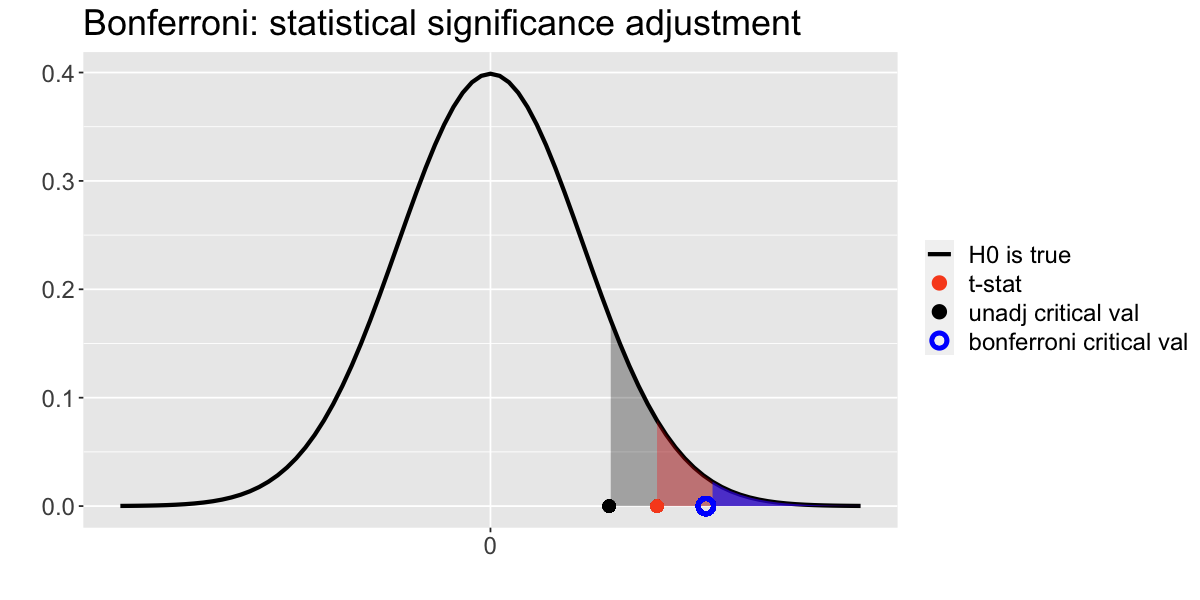

In [2]:
test_plot

### Interpretation

You can compare the **observed t-statistic** with the critical value obtained from the sampling distribuiton to test the null hypothesis:

- **Unadjusted test**: Since the test-statistic (red dot) is greater than the (unadjusted) critical value (black dot), we have evidence to reject the null hypothesis.

- **Bonferroni adjusted test**: Since the test-statistic (red dot) is smaller than the Bonferroni adjusted critical value (blue dot), we do *not* have enough evidence to reject the null hypothesis.

Alternatively, you can compare the **$p$-value** with the pre-set significance level to test the null hypothesis:

- **Unadjusted test**: Since the $p$-value (red area) is smaller than the (unadjusted) significance level (grey area), we have evidence to reject the null hypothesis.

- **Bonferroni adjusted test**: Since the $p$-value (red area) is larger than the Bonferroni adjusted significance level (blue area), we do *not* have enough evidence to reject the null hypothesis.

```{hint}
Note that you can also adjust the $p$-value of a test using a Bonferroni correction!
```

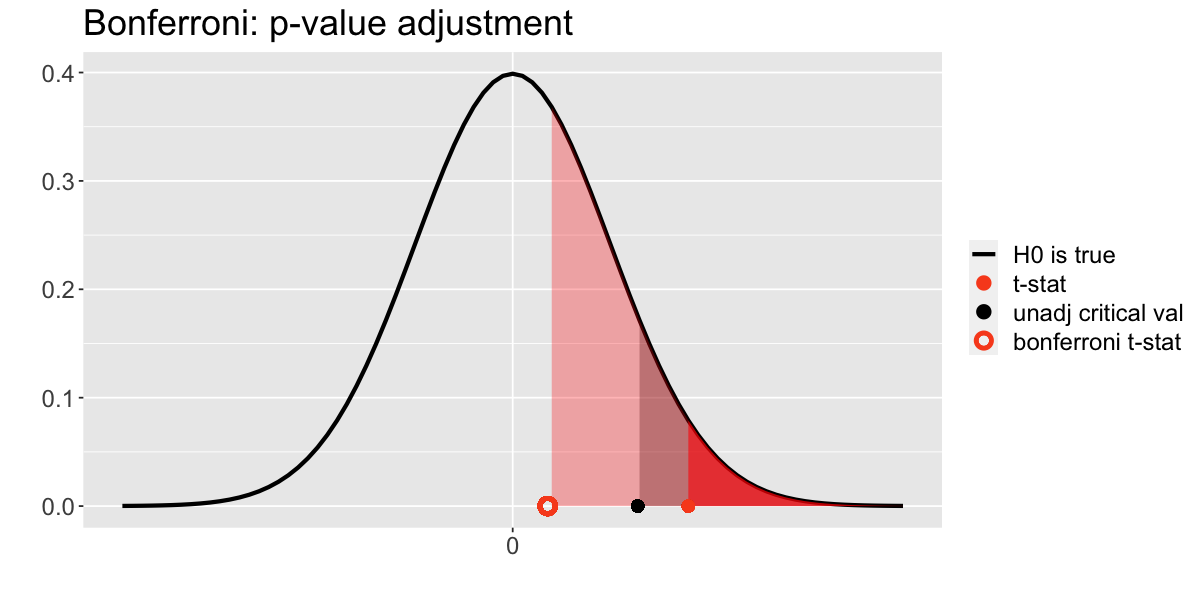

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5) # Adjust these numbers so the plot looks good in your desktop.
options(warn=-1)

t_x_axis <- seq(-4, 4, 0.1)
crit_unadj <- qt(1 - 0.1, 1998)
crit_bonferroni <- qt(1 - 0.01, 1998)
t_stat <- 1.8
adj_t_stat <- qt(1-(1-pt(1.8,1998))*10,1998)

t_dens_data <- data.frame( x = t_x_axis, 
                            y1 = dt(t_x_axis,1998))

test_plot <- ggplot(t_dens_data, aes(x = t_x_axis)) + 
geom_line( aes( y = y1, colour = 'H0 is true' ), size = 1.2 ) + 
geom_area( aes( y = y1, x = ifelse(x > crit_unadj, t_x_axis, NA)), fill = 'black',alpha=0.3) + 
geom_area( aes( y = y1, x = ifelse(x > adj_t_stat, t_x_axis, NA)), fill = 'red',alpha=0.3) + 
geom_area( aes( y = y1, x = ifelse(x > t_stat, t_x_axis, NA)), fill = 'red',alpha=0.6) + 
theme(text = element_text(size = 18),
      legend.title = element_blank() ) +
labs(x = '', y = '' ) + 
geom_point(y=0,x=t_stat,size = 3,shape=19,aes(color = "t-stat"))+
geom_point(y=0,x=crit_unadj,size = 3,shape=19,aes(color = "unadj critical val"))+
geom_point(y=0,x=adj_t_stat,size = 3,shape=1,stroke = 2, aes(color = "bonferroni t-stat"))+
scale_colour_manual( breaks = c("H0 is true", "t-stat","unadj critical val","bonferroni t-stat"), 
                    values = c("black", "#f94f21","black","#f94f21"),
                    guide = guide_legend(override.aes = list(
                         linetype =c("solid",rep("blank",3)),
                         shape = c(NA, rep(16, 2),1))))+
scale_x_continuous(breaks = c(0)) +
ggtitle("Bonferroni: p-value adjustment") 
test_plot

Since the *adjusted* $p$-value (light red area) is larger than the significance level (grey area), we do *not* have enough evidence to reject the null hypothesis.


```{caution}
The solid red area correspond to the unadjusted $p$-value.
```

### A/A Testing (again)

To examine if the Bonferroni's correction effectively controls the type I error rate, we will use again the **A/A experimental design** 

```{important}
We know that the (true) effect size is 0 in an A/A experiment!
```


In [4]:
options(warn=-1)

# Two-sample t-test with tracking sequential statistic and p-values by incremental sample sizes until getting to n in each group.

# @param n (numeric): Initially planned sample size for each group (for simplicity, n needs to be a multiple of sample_increase_step).
# @param d_0 (numeric): effect size.
# @param mean_current (numeric): Population mean for control variation.
# @param sd_current (numeric): Population standard deviation for current variation.
# @param sd_new (numeric): Population standard deviation for new variation.
# @param sample_increase_step (numeric): Sample size increment.

# @return p.value.df: A tibble that has 3 columns:
# inc_sample_size, statistic, and p_value 

incremental_t_test <- function(n, d_0, mean_current, sd_current, sd_new, sample_increase_step) {
  sample_current <- rnorm(n, mean = mean_current, sd = sd_current)
  sample_new <- rnorm(n, mean = mean_current + d_0, sd = sd_new)

  p.value.df <- tibble(
    inc_sample_size = rep(0, n / sample_increase_step),
    statistic = rep(0, n / sample_increase_step),
    p_value = rep(0, n / sample_increase_step)
  )

  current_sample_size <- sample_increase_step
  
  for (i in 1:nrow(p.value.df))
  {
    t_test_results <- t.test(sample_new[1:current_sample_size], sample_current[1:current_sample_size],
      var.equal = TRUE,
      alternative = "greater"                      
    )
    p.value.df[i, "statistic"] <- as_tibble(t_test_results$statistic)
    p.value.df[i, "p_value"] <- as_tibble(t_test_results$p.value)
    p.value.df[i, "inc_sample_size"] <- current_sample_size
    current_sample_size <- current_sample_size + sample_increase_step
  }

  return(p.value.df)
}

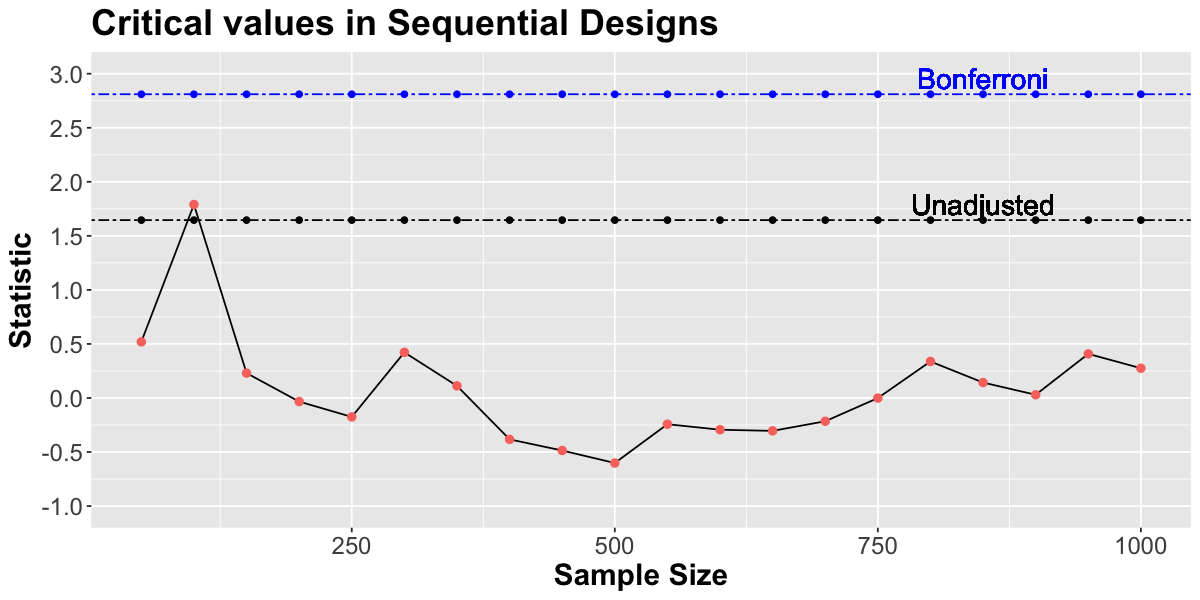

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5) # Adjust these numbers so the plot looks good in your desktop.

set.seed(301)
answer2.1 <- 
    incremental_t_test(n = 1000, d_0 = 0, sample_increase_step = 50, mean_current = 200, sd_current = 50, sd_new = 50)


crit_unadj <- qt(1 - 0.05, 1998)
crit_bonferroni <- qt(1 - 0.0025, 1998)

sequential_stat <- 
  answer2.1 %>%
  ggplot() +
  geom_line(aes(x = inc_sample_size, y = statistic)) +
  geom_point(aes(x = inc_sample_size, y = statistic,colour ="#f94f21"), size = 2) +
#  geom_hline(yintercept = crit_pocock, colour = "red", linetype = "twodash") +
#  geom_point(aes(x = inc_sample_size, y = crit_pocock), colour = "red") +
#  geom_text(x=850, y=crit_pocock + 0.15, size=6, label="Pocock",colour = "red") +
  geom_hline(yintercept = crit_bonferroni, colour = "blue", linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = rep(crit_bonferroni, 20)), colour = "blue") +
  geom_text(x=850, y=crit_bonferroni + 0.15, size=6, label="Bonferroni",colour = "blue") +
  geom_hline(yintercept = crit_unadj, linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = rep(crit_unadj, 20))) +
  geom_text(x=850, y=crit_unadj + 0.15, size=6, label="Unadjusted") +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.position="none") +
  ggtitle("Critical values in Sequential Designs") +
  ylab("Statistic") +
  xlab("Sample Size") +
  coord_cartesian(ylim = c(-1, 3)) +
  scale_y_continuous(breaks = seq(-1, 3, by = 0.5))
sequential_stat

### Interpretations of Bonferroni correction

In *one* A/A testing simulated experiment, using unadjusted quantities:

- you would reject $H_0$: the observed (unadjusted) t-statistic is bigger than the (unadjusted) critical value

Using Bonferroni's adjusted quantities:

- you would fail to reject $H_0$: the observed (unadjusted) t-statistic is smaller than the (adjusted) critical value

```{important}
The Bonferroni's adjusted critical value is larger than the unadjusted one: the test is *more conservative*!  With the adjustment, we erroneously reject $H_0$ less often!! it controls the type I error rate!! 
```


##  Pocock's boundaries

Other methods can be used to control the type I error rate in A/B testing experiments with early stops. 

The **Pocock method** computes a *common* critical value for all interim analyses. 

- the Pocock's boundary is not an adjustment of the quantile of a $t$-distribution 

- we can easily get the critical values for this design using `gsDesign::gsDesign()`

```{admonition} Remarks
:class: attention

**Note 1**: `gsDesign()` outputs a full sequential design. You can read more about this package [here](https://keaven.github.io/gsDesign/reference/gsDesign.html)

**Note 2**: a caveat about this package is that two-sample tests are based on $z$-statistics. However, results are nearly equivalent to a $t$-test. More can be read [here](https://keaven.github.io/gsDesign/articles/nNormal.html)

```

### A/A Testing (again)

To examine if the Pocock method effectively controls the type I error rate, we can use again the **A/A experimental design** 

```{important}
We know that the (true) effect size is 0 in an A/A experiment!
```


In [6]:
# Run this cell to get a Pocock design!
library(gsDesign)

design_pocock <- gsDesign(k = 20, #number of interim analysis planned
                          test.type = 1, # for one-sided tests
                          delta = 0, # default effect size
                          alpha = 0.05, #type II error rate
                          beta = 0.2, # type II error rate
                          sfu = 'Pocock')
                          
crit_pocock <- design_pocock$upper$bound

ERROR: Error in library(gsDesign): there is no package called ‘gsDesign’


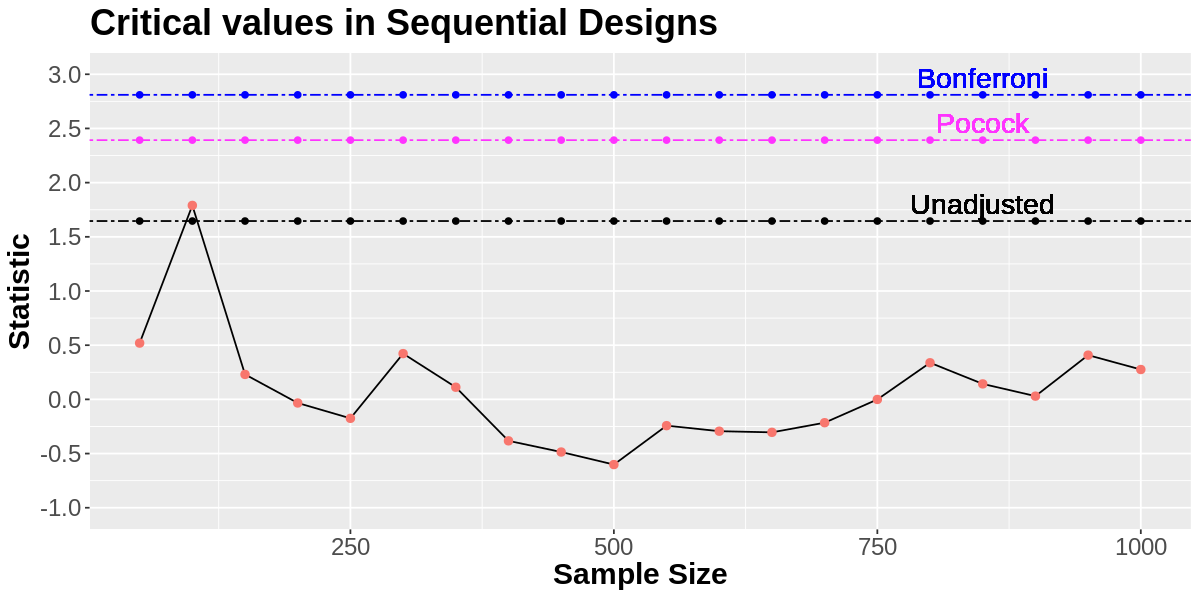

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5) # Adjust these numbers so the plot looks good in your desktop.

set.seed(301)
answer2.1 <- 
    incremental_t_test(n = 1000, d_0 = 0, sample_increase_step = 50, mean_current = 200, sd_current = 50, sd_new = 50)


crit_unadj <- qt(1 - 0.05, 1998)
crit_bonferroni <- qt(1 - 0.0025, 1998)

sequential_stat <- 
  answer2.1 %>%
  ggplot() +
  geom_line(aes(x = inc_sample_size, y = statistic)) +
  geom_point(aes(x = inc_sample_size, y = statistic,colour ="#f94f21"), size = 2) +
  geom_hline(yintercept = crit_pocock, colour = "#ff33ff", linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = crit_pocock), colour = "#ff33ff") +
  geom_text(x=850, y=crit_pocock + 0.15, size=6, label="Pocock",colour = "#ff33ff") +
  geom_hline(yintercept = crit_bonferroni, colour = "blue", linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = rep(crit_bonferroni, 20)), colour = "blue") +
  geom_text(x=850, y=crit_bonferroni + 0.15, size=6, label="Bonferroni",colour = "blue") +
  geom_hline(yintercept = crit_unadj, linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = rep(crit_unadj, 20))) +
  geom_text(x=850, y=crit_unadj + 0.15, size=6, label="Unadjusted") +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.position="none") +
  ggtitle("Critical values in Sequential Designs") +
  ylab("Statistic") +
  xlab("Sample Size") +
  coord_cartesian(ylim = c(-1, 3)) +
  scale_y_continuous(breaks = seq(-1, 3, by = 0.5))
sequential_stat 

### Interpretations of Pocock correction

In *one* A/A testing simulated experiment, using unadjusted quantities:

- you would reject $H_0$: the observed (unadjusted) t-statistic is bigger than the (unadjusted) critical value

Using Pocock's critical values:

- you would fail to reject $H_0$: the observed (unadjusted) t-statistic is smaller than the (adjusted) critical value

```{important}
The Bonferroni's adjusted critical value is larger than Pocock's critical values: the Bonferroni test is the *most conservative* test. Pocock method gives some control of the type I error rate!! Bonferroni gives a more conservative control of the type I error rate!! 
```

##  O'Brien-Fleming's boundaries

Another method available in `gsDesign` is the **O’Brien-Fleming method**

Unlike previous methods, the O’Brien-Fleming method uses *non-uniform* boundaries

- the test has conservative critical values for earlier interim analyses and less conservative values (closer to the unadjusted critical values) as more data are collected 
 

In [13]:
design_of <- gsDesign(k = 20, #number of interim analysis planned
                          test.type = 1, # for one-sided tests
                          delta = 0, # default effect size
                          alpha = 0.05, #type I error rate
                          beta = 0.2, # type II error rate
                          sfu = 'OF')
                          
crit_of <- design_of$upper$bound

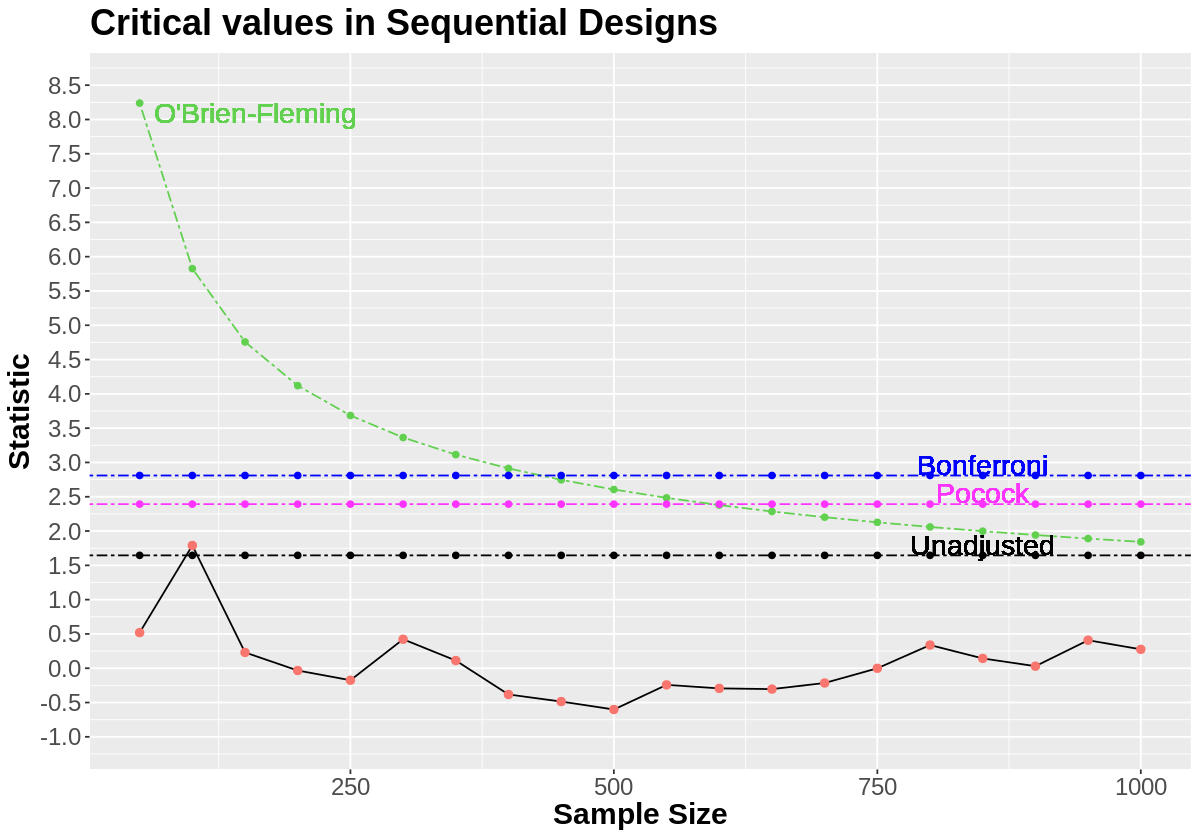

In [15]:
options(repr.plot.width = 10, repr.plot.height = 7) # Adjust these numbers so the plot looks good in your desktop.

set.seed(301)
answer2.1 <- 
    incremental_t_test(n = 1000, d_0 = 0, sample_increase_step = 50, mean_current = 200, sd_current = 50, sd_new = 50)


crit_unadj <- qt(1 - 0.05, 1998)
crit_bonferroni <- qt(1 - 0.0025, 1998)

sequential_stat <- 
  answer2.1 %>%
  ggplot() +
  geom_line(aes(x = inc_sample_size, y = statistic)) +
  geom_point(aes(x = inc_sample_size, y = statistic,colour ="#f94f21"), size = 2) +
  geom_hline(yintercept = crit_pocock, colour = "#ff33ff", linetype = "twodash") +
  geom_line(aes(x = inc_sample_size, y = crit_of),colour = 3, linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = crit_of), colour = 3) +
  geom_text(x=160, y= crit_of[1] - 0.15, size=6, label="O'Brien-Fleming",colour = 3) +
  geom_point(aes(x = inc_sample_size, y = crit_pocock), colour = "#ff33ff") +
  geom_text(x=850, y=crit_pocock + 0.15, size=6, label="Pocock",colour = "#ff33ff") +
  geom_hline(yintercept = crit_bonferroni, colour = "blue", linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = rep(crit_bonferroni, 20)), colour = "blue") +
  geom_text(x=850, y=crit_bonferroni + 0.15, size=6, label="Bonferroni",colour = "blue") +
  geom_hline(yintercept = crit_unadj, linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = rep(crit_unadj, 20))) +
  geom_text(x=850, y=crit_unadj + 0.15, size=6, label="Unadjusted") +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.position="none") +
  ggtitle("Critical values in Sequential Designs") +
  ylab("Statistic") +
  xlab("Sample Size") +
  coord_cartesian(ylim = c(-1, 8.5)) +
  scale_y_continuous(breaks = seq(-1, 8.5, by = 0.5))
sequential_stat 

### Interpretations of O'Brien-Fleming correction

In *one* A/A testing simulated experiment, using unadjusted quantities:

- you would reject $H_0$: the observed (unadjusted) t-statistic is bigger than the (unadjusted) critical value

Using O'Brien-Fleming's critical values:

- you would fail to reject $H_0$: the observed (unadjusted) t-statistic is smaller than the (adjusted) critical value

```{important}
The O'Brien-Fleming's critical values are non-constant!! The test is *very* conservative at the beginning when less data is available and becomes less conservative as more data is collected. </font>
```

### Type I error rate control

To better understand the type I error rate control of the 3 approaches, you need to repeat the experiments *many* times and calculate the rate at which you erroneously reject $H_0$.

#### Number of erroneous rejections among 100 experiments

In [16]:
set.seed(120)

### Run this before continuing
multiple_times_sequential_tests <- tibble(experiment = 1:100) %>% 
    mutate(seq_test = map(.x = experiment, 
                          .f = function(x) incremental_t_test(n = 1000, d_0 = 0, sample_increase_step = 50, 
                              mean_current = 200, sd_current = 50, sd_new = 50)))

typeI_rate  <- multiple_times_sequential_tests %>% 
    mutate(reject = map_dbl(.x = seq_test, .f = function(x) sum(x$p_value<0.05) > 0)) %>%
    mutate(n_reject_bonferroni = map_dbl(.x = seq_test, .f = function(x) sum(x$p_value < 0.05/20) > 0)) %>%
    mutate(n_reject_pocock = map_dbl(.x = seq_test, .f = function(x) sum(x$statistic > crit_pocock) > 0)) %>%
    mutate(n_reject_OF = map_dbl(.x = seq_test, .f = function(x) sum(x$statistic > crit_of) > 0)) %>%
    summarise(Unadjusted = sum(reject),
              Bonferroni= sum(n_reject_bonferroni),
              Pocock = sum(n_reject_pocock),
              OBrienFleming = sum(n_reject_OF),
              expected_n_rejections = 5)
typeI_rate

Unadjusted,Bonferroni,Pocock,OBrienFleming,expected_n_rejections
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,2,7,4,5


## Conclusions

For the simulated experiments in the example above: 

- the type I error rate using unadjusted values was 24% (way above the planned 5% value)

- the type I error rate using Bonferroni was 2% (below the planned 5% value)

- the type I error rate using Pocock was 7% (above the planned 5% value)

- the type I error rate using O'Brien-Flemming was 4% (slightly below the planned 5% value)

```{important}
Using a **principled peeking** procedure, the data can be sequentially analyzed and the experiment can be stopped earlier while controlling the type I error rate.
```

## Summary and key concepts learned


1. In many A/B testing experiments, users would like to stop their experiments earlier depending on the results of interim analyses


2. If you make lots of comparisons, but don’t correct for it, your error rates are inflated!! Naively peeking at the data many times and stopping the experiment earlier than planned increases the probability of *incorrectly* rejecting the null hypothesis. 

3. Stops must be part of the experimental design and appropriate testing methods must be used!


4. A possible way to control the type I error rated is to use a **Bonferroni adjustment** of the $p$-values (or equivalently the significance level or critical values). As with other multiple comparison problems, the Bonferroni's correction in sequential analysis is very conservative and can affect the power of the test!!


9. The **Pocock method** offers a less conservative way of controlling the type I error rate in sequential testing with early stops.


10. The **O'Brien-Fleming method** offers a less conservative way of controlling the type I error rate in sequential testing with early stops.


```{attention} 
Principled peeking is ok and even beneficial in A/B testing. The experimental design is a very important piece of any statistical analysis! 
```